# **Deep Learning** _Day 115_
##### Name: Muhammad Hassaan
##### Date: August 26, 2024
##### Email: muhammadhassaan7896@gmail.com

# **Image Classification with TensorFlow**
This Jupyter Notebook will guide you through the process of building an `image classification` model using TensorFlow, a popular open-source machine learning framework. The goal is to create a model that can accurately classify images into different categories.

In [77]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras

# print version of tensorflow 
print("The version of tensorflow is:", tf.__version__)

The version of tensorflow is: 2.17.0


# **Import the fashion Mnist Dataset**

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [78]:
# Import the fashion mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# check the shape of the dataset
print("The shape of training set is:", fashion_mnist[0][0].shape)
print("The shape of testing set is:",fashion_mnist[1][0].shape)

The shape of training set is: (60000, 28, 28)
The shape of testing set is: (10000, 28, 28)


In [79]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [80]:
# seperate the training images and test images
(train_images, train_labels), (test_images, test_labels) = fashion_mnist 

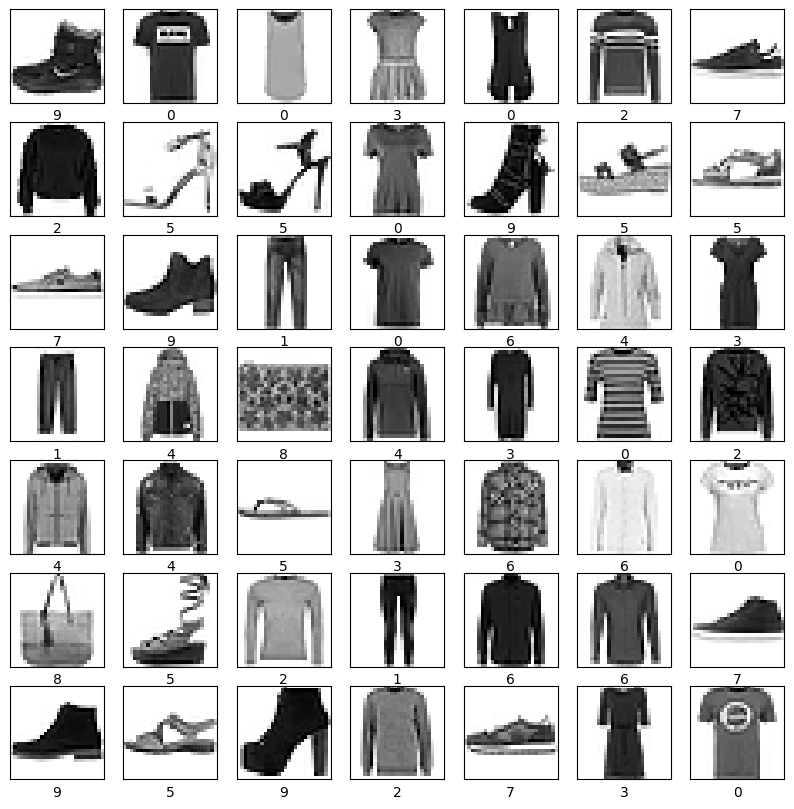

In [81]:
# display some sample images
plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Preprocess the Data

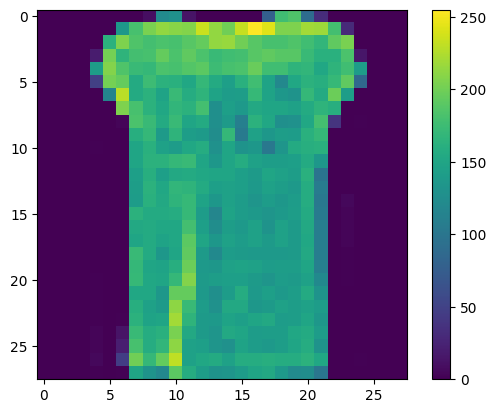

In [82]:
# draw a sample image
plt.figure()
plt.imshow(train_images[47658], cmap='viridis')
plt.colorbar()
plt.show()

In [83]:
# display the values of each pixel in the image
print("Pixel Vlaues in Given Image")
for row in train_images[47658]:
    for pixel in row:
        print("{:3}".format(pixel), end="")
    print()

Pixel Vlaues in Given Image
  0  0  0  0  0  0  0  0  9123129 13  0  0  0  0  0 77177185 90 32  0  0  0  0  0  0
  0  0  0  0  0  0135181204214210208235214200233255243206206220218179 30  0  0  0  0
  0  0  0  0  0164206185179183181189195214216200189181181185177168193204  0  0  0  0
  0  0  0  0 19202166179181195183193183173177179189193189189173162162183 15  0  0  0
  0  0  0  0142208185173170183181187191175181183197177177166168152166177141  0  0  0
  0  0  0  0 48202195156175164162152170156144162177148119152164160171193 86  0  0  0
  0  0  0  0  0115229156164148173158166148141142171148135131170156198142  0  0  0  0
  0  0  0  0  0  0206181164152168164179127144137154150150146156166160  0  0  0  0  0
  0  0  0  0  0  0  3183173156173150156127139110164152127129152179 38  0  1  0  0  0
  0  0  0  0  0  0  0160170139166142139125170104146135142141162170  0  0  0  0  0  0
  0  0  0  0  1  0  0150162146141152158129150131135102133156160162  0  0  0  0  0  0
  0  0  0  0  0  0  01501641641701731

In [84]:
# Nomrmalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

Pixel Vlaues in Given Image
0.000.000.000.000.000.000.000.000.040.480.510.050.000.000.000.000.000.300.690.730.350.130.000.000.000.000.000.00
0.000.000.000.000.000.000.530.710.800.840.820.820.920.840.780.911.000.950.810.810.860.850.700.120.000.000.000.00
0.000.000.000.000.000.640.810.730.700.720.710.740.760.840.850.780.740.710.710.730.690.660.760.800.000.000.000.00
0.000.000.000.000.070.790.650.700.710.760.720.760.720.680.690.700.740.760.740.740.680.640.640.720.060.000.000.00
0.000.000.000.000.560.820.730.680.670.720.710.730.750.690.710.720.770.690.690.650.660.600.650.690.550.000.000.00
0.000.000.000.000.190.790.760.610.690.640.640.600.670.610.560.640.690.580.470.600.640.630.670.760.340.000.000.00
0.000.000.000.000.000.450.900.610.640.580.680.620.650.580.550.560.670.580.530.510.670.610.780.560.000.000.000.00
0.000.000.000.000.000.000.810.710.640.600.660.640.700.500.560.540.600.590.590.570.610.650.630.000.000.000.000.00
0.000.000.000.000.000.000.010.720.680.610.680.590.610.500.550.430.64

<Figure size 640x480 with 0 Axes>

<Axes: >

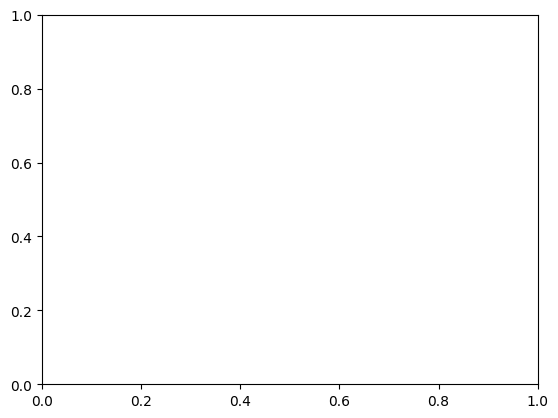

In [85]:
# now display the image to chech pixel is normalize or not
print("Pixel Vlaues in Given Image")
for row in train_images[47658]:
    for pixel in row:
        print("{:0.2f}".format(pixel), end="")
    print()


# display the complete output of the cell
display(plt.gcf())
display(plt.gca())

In [86]:
# rehsape the images to have a channel dimension
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images= test_images.reshape(test_images.shape[0], 28,28,1)

## Train the Model

In [87]:
# create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)), #input layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)), # pooling layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(), # pooling layer
    tf.keras.layers.Flatten(), # flattening layer
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# print summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
%%time
# train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8280 - loss: 0.4762 - val_accuracy: 0.8702 - val_loss: 0.3620
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 91s 34ms/step - accuracy: 0.8718 - loss: 0.3519 - val_accuracy: 0.8645 - val_loss: 0.3674
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.8885 - loss: 0.3058 - val_accuracy: 0.8945 - val_loss: 0.2954
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.8995 - loss: 0.2749 - val_accuracy: 0.8965 - val_loss: 0.2860
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9116 - loss: 0.2454 - val_accuracy: 0.8967 - val_loss: 0.2901
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9150 - loss: 0.2314 - val_accuracy: 0.8947 - val_loss: 0.2942
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.9216 - loss: 0.2166 - val_accuracy: 0.8999 - val_loss: 0.2859
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9258 -

In [91]:
# model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9049 - loss: 0.2723

Test Loss: 0.2690768539905548

Test Accuracy: 0.906000018119812


In [93]:
# save the model
model.save('models/fashion_mnist_model.keras')

## **Make Predictions**

In [96]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [100]:
test_labels[734]

6

In [101]:
predictions[734]

array([2.8218783e-04, 2.5910435e-07, 3.7098040e-03, 1.4515135e-04,
       5.2263639e-03, 1.0474434e-09, 9.9060565e-01, 7.9384234e-12,
       3.0598982e-05, 4.4965301e-08], dtype=float32)

In [102]:
np.argmax(predictions[734])

6

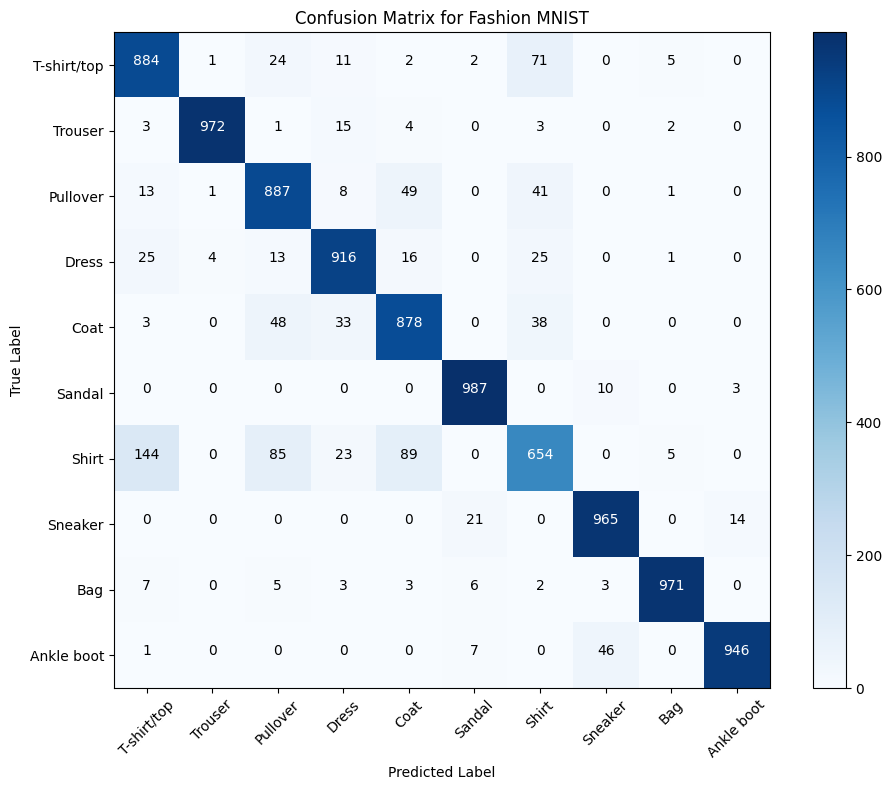

In [104]:
# draw a confusion matrix 
from sklearn.metrics import confusion_matrix

# convert continuous predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)

# define the class labels for fashion MNIST
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# create the confusion matrix 
cm = confusion_matrix(test_labels, predicted_labels)

# plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Fashion MNIST")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# add values to the confusion matrix plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
plt.tight_layout()
plt.show()

---